In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data

In [2]:
path_data = 'data/'
initial_name = '20220804_Titulados_Ed_Superior_'
final_name = '_WEB.csv'
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
data = {}

for year in years:
    path = f"{path_data}{initial_name}{year}{final_name}"
    print(f"leyendo data de año {year}")
    df = pd.read_csv(path,sep=";")
    data[f'df_{year}']=df

leyendo data de año 2010
leyendo data de año 2011
leyendo data de año 2012
leyendo data de año 2013
leyendo data de año 2014
leyendo data de año 2015
leyendo data de año 2016
leyendo data de año 2017
leyendo data de año 2018
leyendo data de año 2019
leyendo data de año 2020
leyendo data de año 2021


# Analisis Exploratorio

In [3]:
data['df_2010'].head()

,cat_periodo,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,sem_ing_carr_act,...,jornada,modalidad,version,tipo_plan_carr,area_cineunesco,area_cine_f_97,subarea_cine_f_97,area_cine_f_13,subarea_cine_f_13,area_carrera_generica_n
0,2010,I81S21C16J2V1,256.0,1,196801,40 y más años,2005,1,NaN,NaN,...,Vespertino,Presencial,1.0,Plan Regular,Educación,Educación,Formación de Personal Docente y Ciencias de la...,Educación,Educación,Pedagogía en Educación Básica
1,2010,I111S2C21J2V1,503.0,2,198106,25 a 29 Años,9998,1,2008.0,1.0,...,Vespertino,Presencial,1.0,Plan Regular,Tecnología,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,"Ingeniería, Industria y Construcción",Arquitectura y Construcción,Técnico en Construcción y Obras Civiles
2,2010,I143T2010N12,621.0,2,198503,25 a 29 Años,2005,1,NaN,1.0,...,Vespertino,Presencial,NaN,Plan Regular,Tecnología,Ciencias,Informática,Tecnología de la Información y la Comunicación...,Tecnología de la Información y la Comunicación...,Ingeniería en Computación e Informática
3,2010,I143S8C36J1V1,622.0,2,198501,25 a 29 Años,2008,1,NaN,1.0,...,Diurno,Presencial,1.0,Plan Regular,Salud,Salud y Servicios Sociales,Medicina,Salud y Bienestar,Salud,Técnico en Enfermería
4,2010,I86S1C29J1V1,627.0,1,198603,20 a 24 Años,2004,1,NaN,NaN,...,Diurno,Presencial,1.0,Plan Regular,Derecho,"Ciencias Sociales, Enseñanza Comercial y Derecho",Derecho,Administración de Empresas y Derecho,Derecho,Derecho


Corroborando que todos los dataframes tengan las mismas columnas con los mismos nombres

In [4]:
columnas_primer_df = list(data.values())[0].columns

for df in list(data.values())[1:]:
    if df.columns.tolist() != columnas_primer_df.tolist():
        print("Los DataFrames no tienen las mismas columnas.")
        break
else:
    print("Todos los DataFrames tienen las mismas columnas.")


Todos los DataFrames tienen las mismas columnas.


In [ ]:
# Listado de columnas
for col in columnas_primer_df:
    print(f"{col}: \n")

In [6]:
(data['df_2010'].area_cine_f_97.unique())

array(['Educación', 'Ingeniería, Industria y Construcción', 'Ciencias',
       'Salud y Servicios Sociales',
       'Ciencias Sociales, Enseñanza Comercial y Derecho', 'Servicios',
       'Agricultura', 'Humanidades y Artes'], dtype=object)

In [7]:
(data['df_2010'].area_carrera_generica_n.unique())

array(['Pedagogía en Educación Básica',
       'Técnico en Construcción y Obras Civiles',
       'Ingeniería en Computación e Informática', 'Técnico en Enfermería',
       'Derecho', 'Pedagogía en Educación Diferencial',
       'Técnico Asistente del Educador Diferencial',
       'Química, Licenciado en Química', 'Ciencias Políticas',
       'Administración de Empresas e Ing. Asociadas',
       'Postítulo en Administración y Comercio', 'Arquitectura',
       'Técnico en Mantenimiento Industrial', 'Odontología',
       'Técnico en Deporte, Recreación y Preparación Física',
       'Ingeniería Civil Electrónica', 'Magister en Ciencias Básicas',
       'Ingeniería Civil Industrial', 'Técnico en Sonido',
       'Postítulo en Derecho', 'Pedagogía en Educación de Párvulos',
       'Enfermería', 'Técnico en Electrónica y Electrónica Industrial',
       'Magister en Administración y Comercio', 'Ingeniería Comercial',
       'Ingeniería en Acuicultura y Pesca',
       'Técnico en Administración 

In [8]:
(data['df_2010'].area_cineunesco.unique())

array(['Educación', 'Tecnología', 'Salud', 'Derecho', 'Ciencias Básicas',
       'Ciencias Sociales', 'Administración y Comercio',
       'Arte y Arquitectura', 'Agropecuaria', 'Humanidades'], dtype=object)

In [9]:
# Eliminando columnas
for df in data.values():
    df.drop("tipo_inst_2", axis=1, inplace=True)
    df.drop("tipo_inst_3", axis=1, inplace=True)
    df.drop("version", axis=1, inplace=True)
    

In [10]:
# ver si se eliminan gabriela mistral y formacion tecnica INFOMED

In [11]:
df_final = pd.DataFrame()
for df in data.values():
    df_final = pd.concat([df_final, df], ignore_index=True)


# Variación en el tiempo del rango etario según distintos tipos de instituciones

In [42]:
# Cantidad de tipos de instituciones
tipos_instutuciones = df_final['tipo_inst_1'].unique()
print(f"Cantidad de tipos de instituciones: {tipos_instutuciones}")

# Numero de instituciones por tipo

for tipo in tipos_instutuciones:
    print(f"Hay {len(df_final[df_final['tipo_inst_1']==tipo]['nomb_carrera'].unique())} de tipo \"{tipo}\"")

Cantidad de tipos de instituciones: ['Universidades' 'Institutos Profesionales' 'Centros de Formación Técnica']
Hay 9731 de tipo "Universidades"
Hay 1380 de tipo "Institutos Profesionales"
Hay 824 de tipo "Centros de Formación Técnica"


In [39]:
# universidad
df_uni = df_final[df_final['tipo_inst_1']=="Universidades"]

counts_df_uni = pd.pivot_table(df_uni, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()

counts_df_uni.head()

,rango_edad,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,15 a 19 Años,28,32,14,54,51,85,87,184,146,103,172,188
1,20 a 24 Años,24785,26417,30896,34658,36898,37012,36461,38240,38052,37846,29558,43270
2,25 a 29 Años,30230,30410,32977,37897,41010,42754,43614,47622,47969,46982,37620,55223
3,30 a 34 Años,10582,10955,11973,14538,15681,16480,17736,19089,20803,21713,19790,25031
4,35 a 39 Años,6131,6101,6807,8000,8208,8791,9498,10613,11981,12977,11982,15273


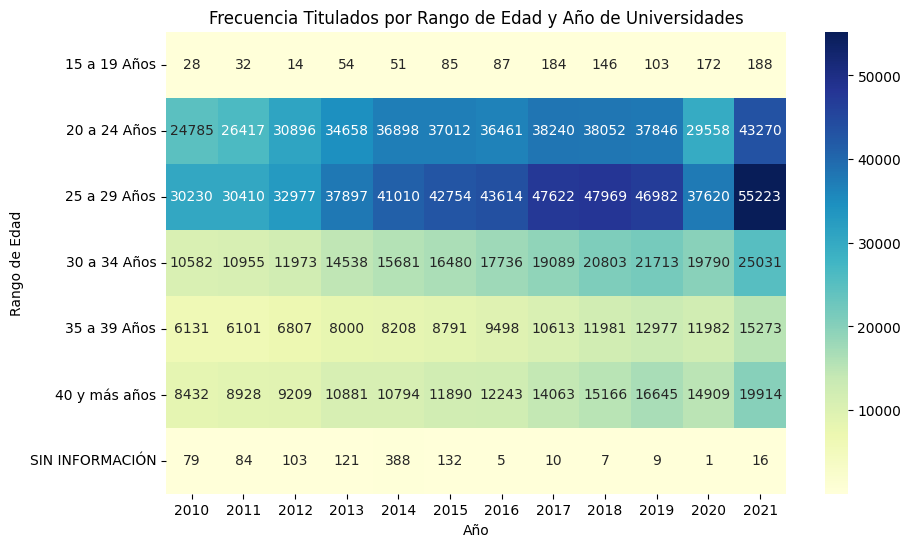

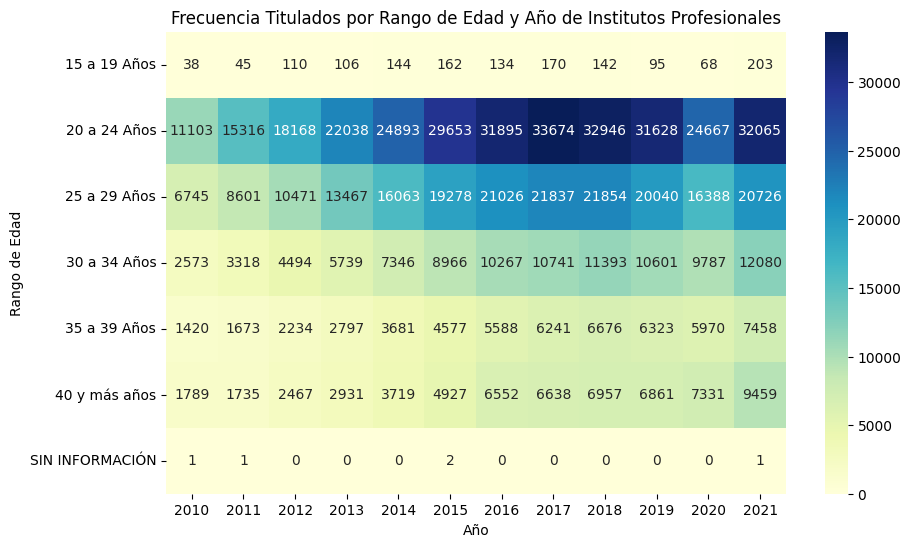

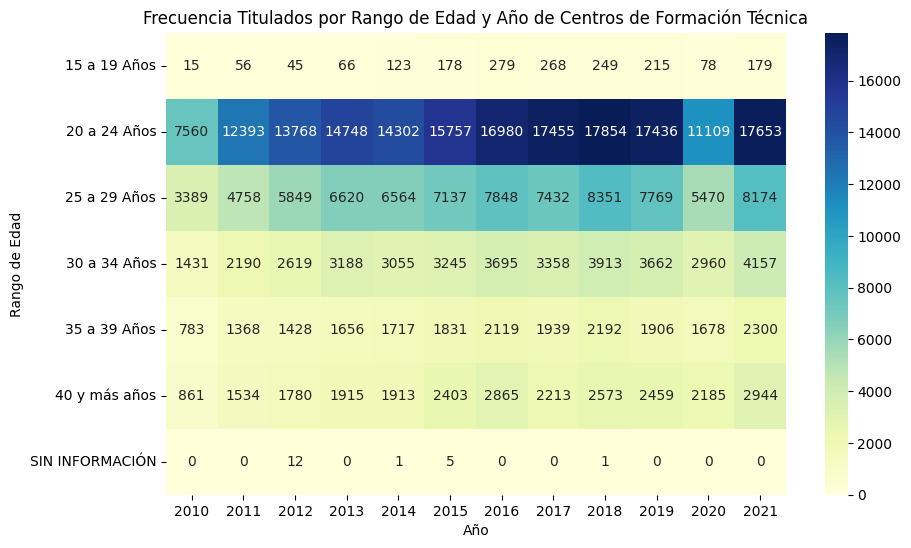

In [43]:
for tipo in tipos_instutuciones:
    df = df_final[df_final['tipo_inst_1']==tipo]
    counts_df = pd.pivot_table(df, index='rango_edad', columns='cat_periodo', aggfunc='size', fill_value=0).rename_axis(None, axis=1).reset_index()
    # Crea el mapa de calor
    plt.figure(figsize=(10, 6))  # Tamaño de la figura
    sns.heatmap(counts_df.set_index('rango_edad'), cmap='YlGnBu', annot=True, fmt='d', cbar=True)

    # Personaliza el mapa de calor
    plt.title(f'Frecuencia Titulados por Rango de Edad y Año de {tipo}')  # Título del gráfico
    plt.xlabel('Año')  # Etiqueta del eje x
    plt.ylabel('Rango de Edad')  # Etiqueta del eje y

    # Muestra el mapa de calor
    plt.show()